### Step 1. Importing packages and loading data 

In [1]:
#Analysis of data on diabetes

#Import packages
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read input dataset
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
# All patients here are females at least 21 years old of Pima Indian heritage.
# Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

diabetes = pd.read_csv("C:/Users/Fapams/Desktop/diabetes/diabetes.csv", delimiter=',')

### Step 2. Data exploration and visualisation

In [3]:
#Dataset consists of 9 columns
#7 columns of an integer type, 2 columns of a float type
#768 records are in the input
#Variables contain no missing values
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.describe()
# Pregnancies variable suggests high number of pregnancies - Mean of 3.84 is found.
# The number of live birth per woman in EU is 1.54 as of 2019
# Data on BMI suggest that the majority of females is either overweight or obese
# Statistics about Blood Pressure (diastolic) imply that 75% of woman experience normal/elevated blood pressure
# Skin thickness is not a good predictor of body, however it is good measure for indicating changes in body composition
# the higher the skin thickness the poorer the body composition
# Insulin measure indicates that the majority of females have normal insulin levels i.e within the range of 16-166
# Glucose concentration below 140 indicates a healthy individual, whereas above 140 suggests prediabetes and diabetese 
# With respect to age only woman above 21 yo are considered
# Pedigree function is a likelihood score of diabetes relevance in the family

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


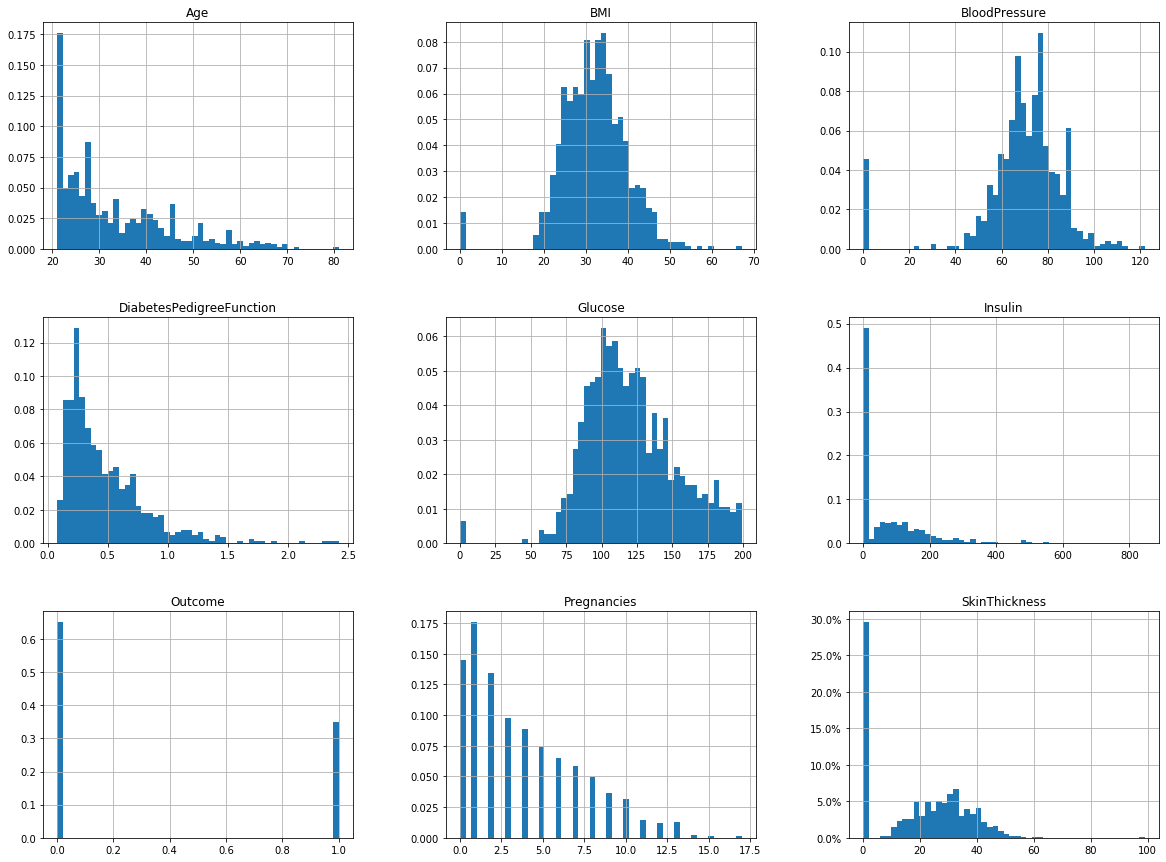

In [5]:
#plot the histograms of variables, apply percentages on y-axis
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
diabetes.hist(bins=50, figsize=(20,15), weights=np.ones(len(diabetes)) / len(diabetes))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [6]:
# Split data into train and test subsets

def split_train_test(data, test_ratio, seed_):
    np.random.seed(seed_)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_diabetes, test_diabetes = split_train_test(diabetes, 0.25, 95)

In [7]:
# Assessment of correlation between variables
corr_matrix = train_diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138449,0.118507,-0.092334,-0.056164,0.010519,-0.026685,0.541754,0.225444
Glucose,0.138449,1.000000,0.159439,0.075657,0.337122,0.213801,0.164841,0.285960,0.481382
BloodPressure,0.118507,0.159439,1.000000,0.228444,0.106359,0.279871,0.046997,0.247842,0.085809
SkinThickness,-0.092334,0.075657,0.228444,1.000000,0.436093,0.390430,0.219214,-0.105283,0.072662
Insulin,-0.056164,0.337122,0.106359,0.436093,1.000000,0.203787,0.184231,-0.010778,0.151436
BMI,0.010519,0.213801,0.279871,0.390430,0.203787,1.000000,0.143009,0.038093,0.285130
DiabetesPedigreeFunction,-0.026685,0.164841,0.046997,0.219214,0.184231,0.143009,1.000000,0.013309,0.218991
Age,0.541754,0.285960,0.247842,-0.105283,-0.010778,0.038093,0.013309,1.000000,0.250835
Outcome,0.225444,0.481382,0.085809,0.072662,0.151436,0.285130,0.218991,0.250835,1.000000


In [8]:
# Assessment of correlation but considering Outcome variable
# Glucose, BMI, Age, Pregnancy, Diabetes, PedigreeFunction seem the most promising according to correlation measures
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.481382
BMI                         0.285130
Age                         0.250835
Pregnancies                 0.225444
DiabetesPedigreeFunction    0.218991
Insulin                     0.151436
BloodPressure               0.085809
SkinThickness               0.072662
Name: Outcome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B8C7A3828>,
      dtype=object)

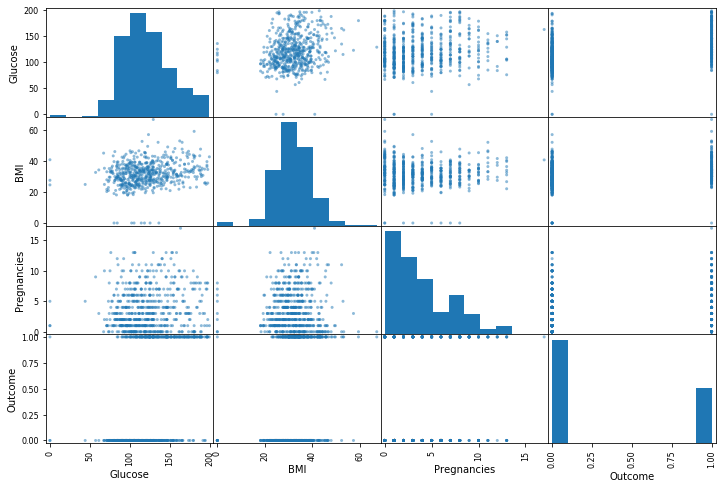

In [9]:
# Perform visualization of correlations for the most promising attributes
from pandas.plotting import scatter_matrix
attributes = ["Glucose", "BMI", "Pregnancies", "Outcome"]
scatter_matrix(train_diabetes[attributes], figsize=(12, 8))

### Step 3. Feature Engineering 

In [10]:
#train: 
#copy labels from target var
train_diabetes_labels = train_diabetes["Outcome"].copy()
#separate predictors from target var
train_diabetes = train_diabetes.drop(["Outcome"], axis=1)

#test:
#copy labels from target var
test_diabetes_labels = test_diabetes["Outcome"].copy()
#separate predictors from target var
test_diabetes = test_diabetes.drop(["Outcome"], axis=1)

In [11]:
# Extract all numeric columns
varlist = list(train_diabetes.columns.values)
#varlist.remove('Outcome')
print(varlist)
# count zeros per column, high contribution of zeros found in skin thickness, insulin, blood pressure, bmi
(train_diabetes[varlist] == 0).sum()/len(train_diabetes)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Pregnancies                 0.142361
Glucose                     0.005208
BloodPressure               0.048611
SkinThickness               0.309028
Insulin                     0.494792
BMI                         0.013889
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

In [12]:
#replace the 0s with medians, pregnanicies column is ok
varlist_0 = ['Insulin', 'SkinThickness', 'Glucose', 'BMI', 'BloodPressure']
train_diabetes[varlist_0] = train_diabetes[varlist_0].replace(0, train_diabetes[varlist_0].median())

In [13]:
#save data for the logarithimic transformation
# train_diabetes_log = train_diabetes[['DiabetesPedigreeFunction', 'Age', 'Insulin']].copy()
# train_diabetes_log.info()

In [14]:
# The following variables i.e DiabetesPedigree Function, Age, Insulin display skewed distribution.
# A logarithmic transformation will be applied to create new features
# for column in train_diabetes_log.columns:
#         try:
#             train_diabetes_log[column] = np.log10(train_diabetes_log[column])
#             
#         except (ValueError, AttributeError):
#             pass

In [15]:
#Rename the newly created fields        
# train_diabetes_log.columns = [str(col) + '_log' for col in train_diabetes_log.columns]

# train_diabetes_log.hist(bins=50, figsize=(20,15), weights=np.ones(len(train_diabetes_log)) / len(train_diabetes_log))
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.show()

In [16]:
# Merge input with log variables
# train_diabetes_adj = pd.merge(train_diabetes, train_diabetes_log, left_index=True, right_index=True)

In [17]:
# Import relevant packages for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

In [33]:
estimator = LogisticRegression(random_state=0, solver = 'lbfgs', max_iter=1000)
transformer = StandardScaler()
pipe = Pipeline([('Trans', transformer), ('LR', estimator)])

model = pipe.fit(train_diabetes, train_diabetes_labels)
prob = pipe.predict_proba(test_diabetes)
y_pred = pipe.predict(test_diabetes)

In [22]:
roc_auc_score(test_diabetes_labels, prob[:,1])

0.8205645161290323

In [28]:
cv_result_acc = cross_val_score(pipe, test_diabetes, test_diabetes_labels, cv = 10, scoring = "accuracy")
cv_result_acc.mean()

0.7286549707602339

In [29]:
cv_result_acc = cross_val_score(pipe, test_diabetes, test_diabetes_labels, cv = 10, scoring = "roc_auc")
cv_result_acc.mean()

0.8067002442002442

In [39]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_diabetes_labels, y_pred).ravel()
tn, fp, fn, tp

(108, 16, 27, 41)

In [46]:
predictions = pd.DataFrame(y_pred).T
predictions_prob = pd.DataFrame(prob).T
predictions.to_excel(excel_writer = "C:/Users/Fapams/Downloads/predictions.xlsx", sheet_name = 'preds')
predictions_prob.to_excel(excel_writer = "C:/Users/Fapams/Downloads/probs.xlsx", sheet_name = 'probs')

In [48]:
16/192

0.08333333333333333